In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [2]:
img = image.load_img("training/background/displayPanel_0_flip_sharpen_d3.jpg")

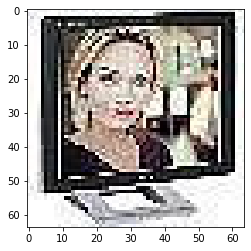

In [3]:
plt.imshow(img)

In [4]:
cv2.imread("training/background/displayPanel_0_flip_sharpen_d3.jpg").shape

(64, 64, 3)

In [5]:
train = ImageDataGenerator(rescale=1/255, shear_range=0.25, zoom_range=0.25, horizontal_flip=True)
validation = ImageDataGenerator(rescale=1/255)

In [6]:
train_data = train.flow_from_directory("training/",target_size=(64, 64), batch_size=32, class_mode='binary')

Found 5875 images belonging to 2 classes.


In [7]:
validation_data = train.flow_from_directory("validation/",target_size=(64, 64), batch_size=32, class_mode='binary')

Found 5875 images belonging to 2 classes.


In [8]:
validation_data.image_shape

(64, 64, 3)

In [9]:
train_data.class_indices

{'background': 0, 'hi': 1}

In [15]:
train_data.classes

array([0, 0, 0, ..., 1, 1, 1])

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape = (64, 64, 3)), 
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0

In [12]:
model.compile(loss = 'binary_crossentropy',
optimizer='rmsprop', metrics=['accuracy'])

In [15]:
model_fit = model.fit(train_data, epochs=10, steps_per_epoch=20, validation_data=validation_data, validation_steps=1000)

Epoch 1/10
20/20 [==============================] - 10s 500ms/step - loss: 0.2214 - accuracy: 0.9203 - val_loss: 0.2136 - val_accuracy: 0.9253
Epoch 2/10
20/20 [==============================] - 2s 82ms/step - loss: 0.2506 - accuracy: 0.9094
Epoch 3/10
20/20 [==============================] - 2s 83ms/step - loss: 0.2406 - accuracy: 0.9109
Epoch 4/10
20/20 [==============================] - 2s 84ms/step - loss: 0.2171 - accuracy: 0.9203
Epoch 5/10
20/20 [==============================] - 2s 87ms/step - loss: 0.2172 - accuracy: 0.9250
Epoch 6/10
20/20 [==============================] - 2s 84ms/step - loss: 0.2354 - accuracy: 0.9000
Epoch 7/10
20/20 [==============================] - 2s 82ms/step - loss: 0.2322 - accuracy: 0.9171
Epoch 8/10
20/20 [==============================] - 2s 85ms/step - loss: 0.1889 - accuracy: 0.9234
Epoch 9/10
20/20 [==============================] - 2s 81ms/step - loss: 0.2154 - accuracy: 0.9234
Epoch 10/10
20/20 [==============================] - 2s 85ms/step

In [16]:
model_fit

In [54]:
model.save('hindi_cnn_model_1.h5')

In [48]:
test_img = image.load_img('test/90.jpg', target_size=(64,64))

In [50]:

test_img = image.img_to_array(test_img)

In [51]:
test_img = np.expand_dims(test_img, axis=0)

In [52]:
verdict = model.predict(test_img)

In [53]:
verdict[0][0]

1.0

In [56]:
import random
import json
# from utils.io import write_json

def write_json(filename, result):
    with open(filename, 'w') as outfile:
        json.dump(result, outfile)

def read_json(filename):
    with open(filename, 'r') as outfile:
        data =  json.load(outfile)
    return data

def generate_sample_file(filename):
    res = {}
    for i in range(1,99):
        
        test_set = str(i) + '.jpg'
        test_path = 'test/' + test_set
        test_img = image.load_img(test_path, target_size=(64,64))
        test_img = image.img_to_array(test_img)
        test_img = np.expand_dims(test_img, axis=0)
        res[test_set] = int(model.predict(test_img)[0][0])

    write_json(filename, res)

if __name__ == '__main__':
    generate_sample_file('./result1.json')